In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Ravinder1191/CAPSTONE-PROJECT/main/MachineLearningProject/EDA_CSV/updated1_survey.csv")

In [3]:
features=['family_history','treatment','work_interfere','remote_work','coworkers','supervisor','no_employees','leave']
encoder=OrdinalEncoder()
data[features]=encoder.fit_transform(data[features])
data[features]=data[features].apply(lambda x:(x-x.min())/(x.max()-x.min()))
for col in features:
    print(data[col].value_counts())

family_history
0.0    767
1.0    492
Name: count, dtype: int64
treatment
1.0    637
0.0    622
Name: count, dtype: int64
work_interfere
1.00    465
0.25    264
0.00    213
0.75    173
0.50    144
Name: count, dtype: int64
remote_work
0.0    883
1.0    376
Name: count, dtype: int64
coworkers
0.5    774
0.0    260
1.0    225
Name: count, dtype: int64
supervisor
1.0    516
0.0    393
0.5    350
Name: count, dtype: int64
no_employees
0.8    290
0.4    289
1.0    282
0.2    176
0.0    162
0.6     60
Name: count, dtype: int64
leave
0.00    563
0.50    266
1.00    206
0.25    126
0.75     98
Name: count, dtype: int64


In [4]:
drop_columns=['Unnamed: 0','Timestamp','anonymity','comments']
for columns in drop_columns:
    data.drop(columns,axis=1)

Encoding leave column

In [5]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data[features])
print(data.isnull().sum())

Unnamed: 0                      0
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


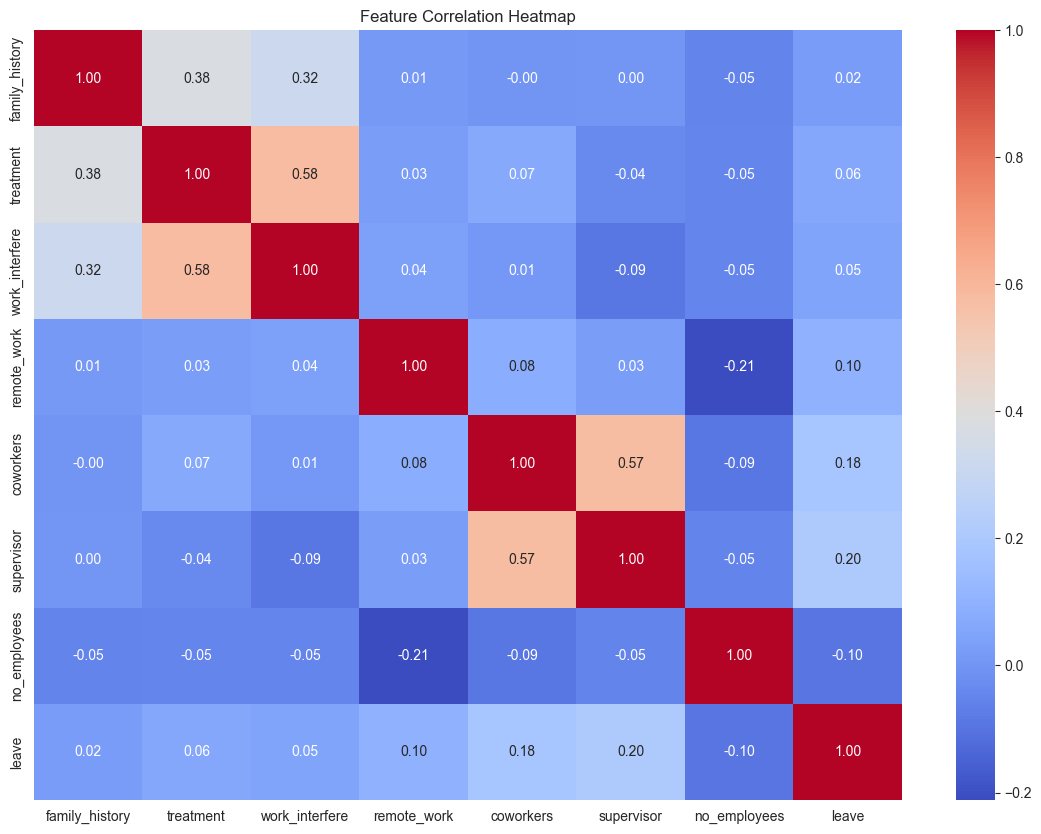

Unnamed: 0                      0
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [6]:
correlation_matrix=data[features].corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()
print(data.isnull().sum())

In [7]:
# Now we reduce dimensions of data using pca
dimension_reduction=PCA(n_components=0.90)
reduced=dimension_reduction.fit(scaled_data)

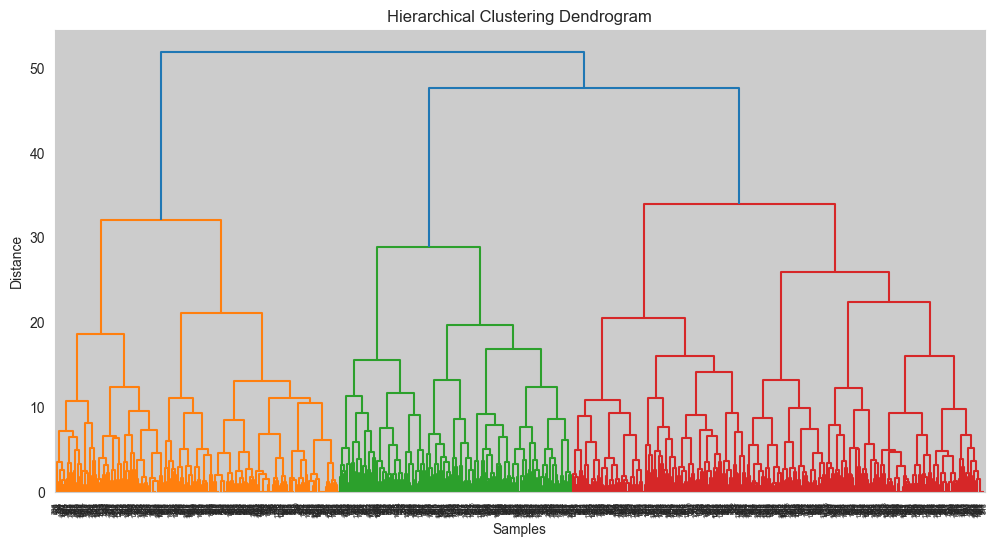


Agglomerative Clustering Silhouette Score: 0.1533


In [8]:
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
agg_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_model.fit_predict(scaled_data)
agg_score = silhouette_score(scaled_data, agg_labels)
print(f"\nAgglomerative Clustering Silhouette Score: {agg_score:.4f}")

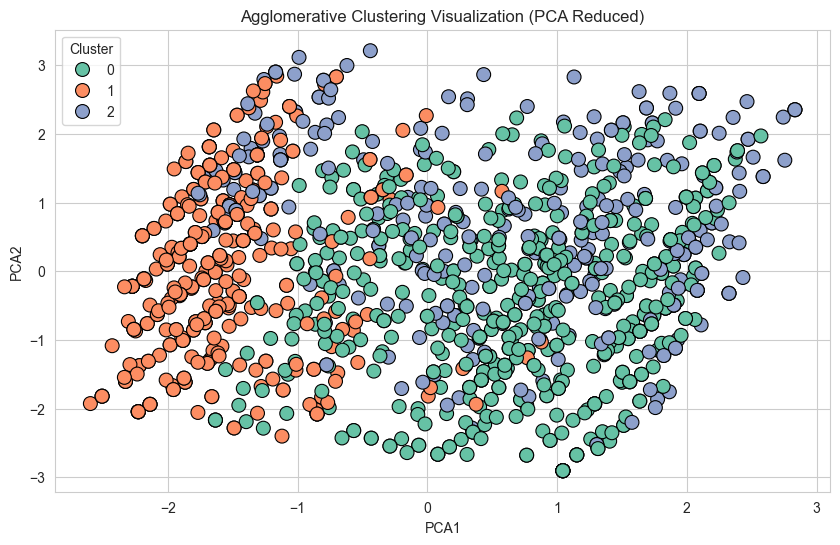

In [9]:
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(scaled_data)

cluster_df = pd.DataFrame(reduced_data_2d, columns=['PCA1', 'PCA2'])
cluster_df['Cluster'] = agg_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, edgecolor='k')
plt.title("Agglomerative Clustering Visualization (PCA Reduced)")

plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [11]:
import plotly.express as px
pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(scaled_data)
df = pd.DataFrame(reduced_3d, columns=["PCA1", "PCA2", "PCA3"])
df["Cluster"] = agg_labels
px.scatter_3d(df, x="PCA1", y="PCA2", z="PCA3", color=df["Cluster"].astype(str),
              title="3D PCA Visualization (Agglomerative Clustering)").show()